# TP 1: Introduction to Regression for Network Data Analysis

## Supervised Learning: A Quick Recap

Supervised learning is a type of machine learning where we **train a model using labeled data**.  

That means each data point has:
- An **input** (also called features)
- A known **output** (label or value)

The goal is to teach the model how to map inputs to outputs so it can make accurate predictions on unseen data.

There are two main types of supervised learning:
- **Classification**: It is used when the output is a **category or class**. In classification, the model picks a **label** from a fixed set of possible answers. (e.g. Is a network connection **normal** or **malicious**?)
- **Regression**: It is used when the output is a **number (a continuous value)**. 
In regression, the model tries to learn a formula that outputs a number — not a category. (e.g. Estimating **download time** based on file size)


## 📝 Exercise 1: Simple Linear Regression

In this first exercise, we will explore **linear regression models**, starting with a simple case where we model an output variable $y$ as a linear function of a single input feature $x$.

We will work with linear models of the form:  $y = \beta_0+\beta_1 x + \epsilon$

where:
- $\beta_0$: the **intercept** (value of $y$ when $x = 0$)  
- $\beta_1$: the **slope** (how much $y$ changes for a one-unit increase in $x$)  
- $\epsilon$: a **random error term** that accounts for noise or variability not explained by the linear relationship

This setup is the foundation of a **linear regression model**.

We assume that the random error term $\epsilon$ follows a **normal distribution** $\epsilon \sim \mathcal{N}(0,\sigma^2)$ where:

- The **mean** of the noise is zero.
- The **variance** of the noise is $\sigma^2$, so the standard deviation is $\sigma$.
- The noise is **independent** of $x$, and each observation is **i.i.d.** (independent and identically distributed).

As a means of example, let us consider the linear model: $y=b_0+b_1x+\epsilon$

with:
- $b_0 = 2$ (intercept)
- $b_1 = 3$ (slope)
- $\sigma = 30$ (standard deviation of the noise)

Note that at the end of the example, you can experiment with different values to your own choice to see how they affect the data and the fitted model.

In this case:
- $y$ is the value we **observe or measure** when the input feature takes the value $x$.
- The **sample size** (i.e., number of data points) is denoted by $n$.

### Preparation: Generating "Synthetic Data"

#### Step 1: Import Required Libraries

First, let's import the necessary libraries for data manipulation, visualization and regression modeling.

In [21]:
# Import necessary libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math
import random
import statsmodels.api as sm
from sklearn import datasets, linear_model

We define the true underlying parameters of the linear model and the sample size to simulate synthetic data for regression analysis.


In [22]:
# Define parameters for synthetic data generation
n = 20 # sample size
b0 = 2 # real intercept (unobserved)
b1 = np.array([3]) # real slope (unobserved)

Now, to simulate data for our linear model $y = \beta_0 + \beta_1 x + \epsilon$, we’ll follow these steps:

#### Step 2: Define the Random Error Term ($\epsilon$)

The error term $\epsilon$ represents random noise in the data. It is sampled from a normal distribution with a specified mean and standard deviation.


In [23]:
# Mean and standard deviation for the error term
mue, sigmae = 0, 30

# Set a random seed to make results reproducible, 
# if you want to fix a 'random' vector and not have different vectors per call:
np.random.seed(199)

# Generate the error vector Er of size n
Er = np.random.normal(mue, sigmae, n)
print("Error vector (Er):", Er)

Error vector (Er): [ 33.24214448  -9.66833454  68.66231565 -55.3634741  -46.02241369
  32.69834474  36.28414203  -8.77906033 -28.89190806   6.07129635
  48.70306245 -69.33409712  31.09989668  70.21805685  -6.69218164
 -19.60951679  24.44625946 -12.92376476  -0.37686216  39.06455214]


#### Step 3: Generate the Feature Input ($x$)

We assume that $x$, our input feature, lies within an interval $[xl, xh]$. We randomly sample $n$ values from this range using a uniform distribution.

In [24]:
# Define bounds for x
xl, xh = 0, 120

# Fixing seed again
np.random.seed(199)

# Generate n values of x uniformly between xl and xh
x = np.random.uniform(xl,xh,n)
print("Input feature vector (x):", x)

Input feature vector (x): [ 78.57500336 117.84471417  47.98856377 101.29831222  55.66108205
  65.38116798  74.337341    39.82041465 117.71944956  31.32134616
 112.80089673   5.39719021  50.41908488  99.59823395  69.68557585
  13.90856407  13.01791564 107.00400554  53.31687507  64.69449614]


#### Step 4: Compute the Output Variable ($y$)

Using the linear model and the generated values of n-sized vectors Er and x, we compute the corresponding values of y.

In [25]:
# Compute y using the model
y = b0 + b1[0] * x + Er
print("Output variable (y):", y)

Output variable (y): [270.96715455 345.86580798 214.62800697 250.53146256 122.96083245
 230.84184868 261.29616502 112.6821836  326.26644061 102.03533484
 389.10575263 -51.1425265  184.35715132 371.01275871 204.36454591
  24.11617543  65.50000638 310.08825187 161.57376303 235.14804055]


#### Step 5: Visualize the Data

Let us plot the line $y=2+3x$ (without noise) as well as the generated points $y$ that include the error.

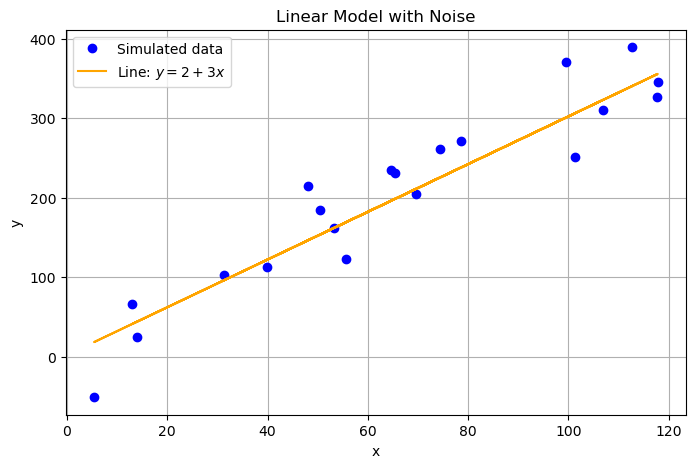

In [26]:
plt.figure(figsize=(8, 5))

plt.plot(x, y, 'o', color='blue', label='Simulated data')
plt.plot(x, b0+b1*x, color='orange',  label='Line: $y = 2 + 3x$')

plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.title("Linear Model with Noise")
plt.grid(True)
plt.show()

#### Step 6: Wrap It Up Into a Function

To make the data generation process reusable, we define the function `genSample()` that creates synthetic data for both **simple** and **multiple linear regression** tasks.

- The function accepts a `seed` parameter:
  - If `seed` is set to an **integer**, the random values are reproducible — the same `x`, `y`, and `Er` vectors are generated every time.
  - If `seed` is left **empty**, the random values change with each call.


- The `size` parameter controls the number of features in the input vector `x`:
  - If `size = 1`, it generates data for **simple linear regression** (one feature).
  - If `size > 1`, it produces inputs for **multiple linear regression** (multiple features).

This structure allows you to generate controlled or randomized data for different types of regression experiments. Keep in mind that this process will be needed for later TP sessions.

In [27]:
def genSample(n, b0, b1, sigmae, xLow, xHigh, seedit=199, size=1):
    if type(seedit) == int:
        np.random.seed(seedit)
        Er = np.random.normal(mue, sigmae, n)
        x = []
        for k in range(size):
            np.random.seed(seedit + k)
            x.append(np.random.uniform(xl, xh, n))
    else:
        np.random.seed()
        Er = np.random.normal(mue, sigmae, n)
        x = []
        for k in range(size):
            np.random.seed()
            x.append(np.random.uniform(xl, xh, n))
        
    # Compute y
    y = b0 + Er
    for k in range(size):
        y += b1[k] * x[k]

    # Output
    if size == 1:
        return (x[0], y, Er)
    else:
        return (x, y, Er)

In [28]:
# Generate synthetic data
n, b0, b1 = 20, 2, np.array([3])
(x, y, Er) = genSample(n, b0, b1, sigmae, xl, xh, seedit=199, size=1)
print("x = ", x)
print("y = ", y)
print("Er = ", Er)

x =  [ 78.57500336 117.84471417  47.98856377 101.29831222  55.66108205
  65.38116798  74.337341    39.82041465 117.71944956  31.32134616
 112.80089673   5.39719021  50.41908488  99.59823395  69.68557585
  13.90856407  13.01791564 107.00400554  53.31687507  64.69449614]
y =  [270.96715455 345.86580798 214.62800697 250.53146256 122.96083245
 230.84184868 261.29616502 112.6821836  326.26644061 102.03533484
 389.10575263 -51.1425265  184.35715132 371.01275871 204.36454591
  24.11617543  65.50000638 310.08825187 161.57376303 235.14804055]
Er =  [ 33.24214448  -9.66833454  68.66231565 -55.3634741  -46.02241369
  32.69834474  36.28414203  -8.77906033 -28.89190806   6.07129635
  48.70306245 -69.33409712  31.09989668  70.21805685  -6.69218164
 -19.60951679  24.44625946 -12.92376476  -0.37686216  39.06455214]


In [29]:
# Create a pandas DataFrame and put the x, Er, y vectors
df_slr = pd.DataFrame({'x': x, 'y': y, 'error': Er})
df_slr

,x,y,error
0,78.575003,270.967155,33.242144
1,117.844714,345.865808,-9.668335
2,47.988564,214.628007,68.662316
3,101.298312,250.531463,-55.363474
4,55.661082,122.960832,-46.022414
5,65.381168,230.841849,32.698345
6,74.337341,261.296165,36.284142
7,39.820415,112.682184,-8.779060
8,117.719450,326.266441,-28.891908
9,31.321346,102.035335,6.071296


### Part A: Analyzing synthetic data

In this part, you will analyze the synthetic dataset you generated using basic statistical tools and linear regression formulas.

You may use either `numPy` or `pandas` for your calculations.

With the above synthetic data: 

* a) Compute the sample means $\bar{x}$, $\bar{y}$ and the sample variance $s_{xx}$ and covariance $s_{xy}$ .

* b) Using the formulas presented in the lecture, calculate the estimated coefficients of the least-squares line: $\hat{y}=\hat{\beta}_0+\hat{\beta}_1x$. Compare your estimated coefficients with the **true values** used to generate the data: $(\beta_0,\beta_1)=(2,3)$ What do you observe? How close are they? What could explain any differences?

* c) Plot the regression line, least-squares line and the data samples on the same graph. Use appropriate labels and a legend to clearly distinguish each line and the data points.

**Optional:** You can later compare your results with those from `scikit-learn` implementation of simple linear regression.

#### Answer:

-1.052402828885164 , 2
3.1468994915667943 , [3]


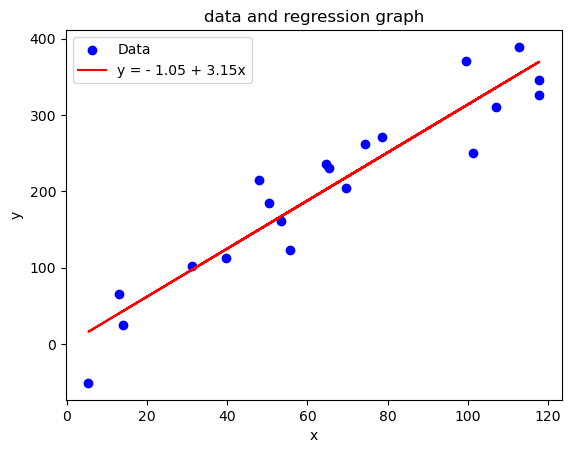

In [30]:
# a)

xb = np.mean(x)
yb = np.mean(y)

Sxx = np.sum((x - xb)**2)
Sxy = np.sum((x - xb) * (y - yb))

SxxM = Sxx/n
SxyM = Sxy/n

# b)
b_1 = Sxy / Sxx
b_0 = yb - b_1 * xb

y_chapeau = b_0 + b_1 * x

print(b_0,",", b0 )
print(b_1,",",b1)

# b_1 and b1 are extremely close
# b_0 and b0 are far 

# c)
plt.scatter(x, y, color='blue', label='Data')

plt.plot(x, y_chapeau, color='red', label='y = - 1.05 + 3.15x')

plt.xlabel('x')
plt.ylabel('y')
plt.title('data and regression graph')

plt.legend()
plt.show()

### Part B: Visualizing data distribution

In this section, you'll explore the distribution of the input feature $x$ using visual tools. You can use either `matplotlib` or `pandas` for this part.

* d) Create a boxplot of the variable $x$ to examine its distribution. This will help you identify the spread, central tendency and possible outliers.

* e) Based on the boxplot, how would you describe the distribution of $x$? Symmetric, left-skewed, right-skewed or uniform?

* f) What does the interquartile range (IQR) tell you about the spread of $x$ values?

* g) Are there any outliers in the feature $x$ based on the boxplot? What would cause them to appear or not appear in a asynthetic dataset like this?

#### Answer:

min x :  5.4  max x :  117.84


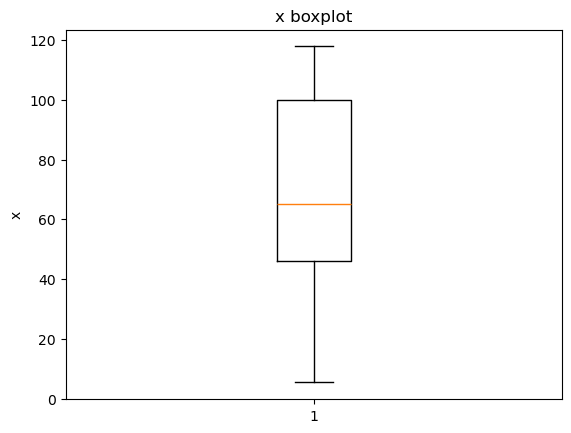

In [38]:
# d)
print("min x : ", round(np.min(x),2)," max x : ", round(np.max(x),2)) 

plt.boxplot(x)
plt.title("x boxplot")
plt.ylabel("x")
plt.show()

#e)
#The distribution of x is left-skewed (our boxplot is vertical but if we turn if by 45° we can see it's left-skewed)

#f)
# IQR -> Q3-Q1 = ~100 - ~45 = 55
# The IQR shows that the x values are spread out.

# g)
# There is not outliner, the whiskers cover all x values

### Part C: Evaluating Model Accuracy

In this section, you will assess how well your regression model fits the synthetic data using standard evaluation metrics. These metrics help quantify the accuracy and reliability of your predictions.

* h) Compute the Residual Standard Error (RSE) and the Mean Squared Error (MSE). What do they tell about the accuracy of the model?

* **Reminder:** The relationship between MSE and RSE is given by: $MSE := \frac{1}{n}RSS = \frac{n-2}{n}RSE^2$.

* i) Compute the coefficient of determination ($R^2$-statistic). What does it tell about the accuracy of the model?

* j) Calculate the $95\%$ confidence intervals for the estimated coefficients. Do the real coefficients $\beta_0=2$ and $\beta_1=3$ fall within these intervals?

**Optional:** You may compare your manually calculated metrics and intervals with those obtained using `scikit-learn`'s `LinearRegression` implementation.

#### Answer:

In [74]:
#h)
e = y - y_chapeau

MSE = np.sum(e**2) / n
RSE = np.sqrt(RSS / (n - 2))

print("max y : ", round(np.max(y)), ", min y : ", round(np.min(y)))
print("MSE =", round(MSE,2), ", RSE =", round(RSE,2))

# The RSE of 40 indicates that, on average, the model's predictions deviate by about more or less 40 units from the actual values, which is relatively small compared to the total range of y (440), so the model fits the data pretty well.

# i)
TSS = np.sum((y - yb)**2)
print ("TSS = ", round(TSS,2))

coefD = 1 - (RSS / TSS)

print ("R² =",round(coefD,5))

# the regression fits the data

#j)


SE_b0 = RSE**2 * ( 1/n + (xb**2/ np.sum((x-xb)**2)))
SE_b1 = RSE**2 / (xb**2/ np.sum((x-xb)**2))

print("SE_b0 =", round(SE_b0,2), ", SE_b1 =", round(SE_b1,2))

b0_95 = 2 * SE_b0
b1_95 = 2 * SE_b1

print("Interval b0 : [", b_0-2*SE_b0,";",b_0+2*SE_b0,"]")
print("Interval b1 : [", b_1-2*SE_b1,";",b_1+2*SE_b1,"]")

max y :  389 , min y :  -51
MSE = 1441.63 , RSE = 40.02
TSS =  264214.33
R² = 0.89087
SE_b0 = 373.55 , SE_b1 = 8743.17
Interval b0 : [ -748.161777280218 ; 746.0569716224476 ]
Interval b1 : [ -17483.197915508914 ; 17489.491714492047 ]


## 📝 Exercise 2: Multiple Linear Regression

In this exercise, we will extend simple linear regression to a **multi-variable setting**. Specifically, we work on problems of multi-linear regression with multiple input features and examine how each input feature contributes to predicting the output variable.

We work with a multiple linear regression model using 4 input features. 

The regression model is: $y = \beta_0 + \beta_1x_1 + \beta_2x_2 + \beta_3x_3 + \beta_4x_4 + \epsilon$

where:
- $x_1$, $x_2$, $x_3$ are features that influence $y$
- $x_4$ is constructed as noise: $x_4=np.ones(n)+Er$, meaning it should not have any true effect on the target $y$.

### Step 1: Generate Synthetic Data

We use the `genSample()` function again to simulate a dataset with multiple features. You can adjust the number of features via the `size` parameter.

- The model is still based on: $Y = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \dots + \beta_d x_d + \varepsilon$
- We'll use a fixed seed for reproducibility.
- The noise term $\varepsilon \sim \mathcal{N}(0, \sigma^2)$ adds randomness, simulating real-world measurement error.

In [ ]:
# Define parameters for synthetic data generation
n = 100 # sample size
b0 = 2 # real intercept (unobserved)
b1 = np.array([3, 7, 20])   # real slope (unobserved) for 3 input features
xl, xh = 0, 120 # input range for features
sigmae = 30 # standard deviation for error term

In [ ]:
# Generate synthetic data using the true model and added Gaussian noise
(xM,yM,ErM) = genSample(n, b0, b1, sigmae, xl, xh, seedit=199, size=len(b1))
x_extra = 1 + ErM   # This variable has no real meaning, just noise centered around 1
xM.append(x_extra)  # Now xM has 4 features: [x1, x2, x3, x_extra]
yM += xM[-1]        # Modify yM so x_extra appears to influence y

### Step 2: Visualize Data

We collect the generated features, target variable, and noise into a structured format using a `pandas.DataFrame`.

In [ ]:
# Create a structured DataFrame for visual inspection
dataM = {'x1': xM[0], 'x2' : xM[1],'x3' : xM[2] ,'x4': xM[3], 'error': ErM, 'y_mult': yM}
df_slrM = pd.DataFrame(data=dataM)
df_slrM

### Step 3: Analysis & Interpretation of Regression Results

Now that you’ve generated and organized the synthetic dataset, analyze the statistical properties of the regression models and understand the role of each input feature.

* a) For the above multi-regression model, estimate the unknown regression coefficients $(\beta_0,...,\beta_4)$ using all four features. Also compute the p-values, F-statistic and $R^2$ score for each feature. What do the p-values and F-statistic tell you about which features are truly significant?

* b) Fit a multi-regression model only using $(x_2,x_4)$. Estimate the coefficients and determine the p-values, F-statistic and $R^2$ score again. How do the p-values and F-statistic compare with results from part (a)? What does this imply? Are all the features relevant to the model?

* c) Fit four seperate single-feature regression models (one for each variable $x_i$). Compare the estimated slopes $\beta_1$, $\ldots$, $\beta_4$ from these single-variable models to those from the multi-variable model in part (a). What do you notice?

* d) Compare the answers from (a), (b), (c). What do you observe? Explain.

**Hint 1:** Use `LinearRegression()` from `scikit-learn` and create a linear regression object.

**Hint 2:** For the p-values and the F-statistic, you can use the scikit-learn command `sklearn.feature_selection.f_regression`

scikit documnetation: https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.f_regression.html

#### Answer:

Here is the answer for part (a) using `statsmodels`, you need to do it with `scikit-learn`.

In [ ]:
# using pandas
Xm = df_slrM[["x1", "x2", "x3", "x4"]]
Ym = df_slrM["y_mult"]
Xm = sm.add_constant(Xm) ## let's add an intercept (beta_0) to our model

# Note the difference in argument order
model = sm.OLS(Ym, Xm).fit()
y_pred_OLS = model.predict(Xm) # make the predictions using SAME train data

# Print out the statistics
model.summary()

In [ ]:
## TODO:

# Import necessary libraries
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import f_regression

## 📝 Exercise 3: Univariate Linear Regression with Real Network Data

In this final exercise, we will apply a simple linear regression to a real-world dataset related to network traffic. 

The goal is to:
- Load and explore a dataset
- Select one numerical feature to predict a target variable
- Train a linear regression model using **scikit-learn**
- Visualize and interpret the results

We will use tools provided in the course library and analyze actual features from network measurements.

### Dataset Overview: Requet Dataset

We use a dataset of QoE prediction from [Requet dataset](https://github.com/Wimnet/RequetDataSet) — a public dataset designed for **real-time QoE detection** on encrypted YouTube traffic.
- The goal is to predict QoE indicators, such as video resolution, based on traffic characteristics.
- The dataset has already been cleaned and simplified for this lab exercise.

### Step 1: Import Libraries

Start by importing the libraries needed for data handling, modeling and visualization.

In [ ]:
# Import necessary libraries
import pandas as pd # For dataframes (tables)
import numpy as np
import matplotlib.pyplot as plt # For plots
import sklearn.linear_model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

### Step 2: Load the Dataset

Make sure your dataset is accessible. This example assumes a file named `network_data.csv` is in the working directory. 

* a) Replace the filename with your actual path to the dataset.

##### Answer:

In [ ]:
# TODO:
filename = "..."
df = pd.read_csv(filename)

In [ ]:
# Preview the dataset
df=df.rename(columns={'label_num':'Resolution'})
df.head()

In [ ]:
# Get some insight on data
df.info(verbose=True)

### Step 3: Select Features for Univariate Linear Regression

**Goal**: Build a univariate linear regression model to predict the value of `Resolution` based on a single input feature: `KBytesReceived`.

In supervised learning, we need to distinguish between:

* **Independent variable $X$** – the input feature used to predict an outcome : `KBytesReceived`
* **Dependent variable $y$** – the value we are trying to predict (also called the target): `Resolution`

In [ ]:
# Selecting one feature and target
X = df[['KBytesReceived']]   # Independent variable (needs to be 2D for scikit-learn)
y = df['Resolution']         # Dependent variable

### Step 4: Visualizing the Data with Scatter Plot

Before training the model, it's helpful to visualize the relationship between the input feature and the target variable. A scatter plot lets us see if a linear relationship might exist between `KBytesReceived` and `Resolution`.

**Optional:** Learn more about plotting with Matplotlib see [mathplotlib documentation](https://matplotlib.org/tutorials/introductory/lifecycle.html).

* b) Create a scatter plot showing `KBytesReceived` vs `Resolution` and save it as "scatter_plot.pdf" under the working directory.

#### Answer:

In [ ]:
## TODO:

### Step 5: Manually Creating a Simple Regression Model

Before using a machine learning library, let’s build a very simple regression model "by hand" to understand the concept.

* c) Without using any machine learning libraries, define a simple linear model to predict `Resolution` from `KBytesReceived`. Choose a slope value of 1.

#### Answer:

In [ ]:
## TODO:

* d) Plot the resulting line over your earlier scatter plot to visually assess the fit. Save the new plot as `scatter_plot2.pdf`

#### Answer:

In [ ]:
## TODO:

### Step 6: Train a Linear Regression Model Using Scikit-learn

Now that you've tried defining a model manually, let's use supervised learning to train a regression model that automatically finds the best slope (and intercept) to fit the data.

We'll use **Ordinary Least Squares (OLS)** — the most common type of linear regression — from `scikit-learn`.

* e) Create the regression model. 
    * **Hint:** Use `LinearRegression()` from `sklearn.linear_model`.

#### Answer:

In [ ]:
## TODO:

* f) Fit the model using your full dataset. 
    * **Hint:** Use `.fit(...)`.

#### Answer:

In [ ]:
## TODO:

* g) Predict the output for a range of input values. 
    * **Hint:** Use `.predict(...)` on your model.

#### Answer:

In [ ]:
## TODO:

* h) Plot the model’s predictions on top of your scatter plot. 
    * **Hint:** Use `ax.plot(...)` and add a legend with `ax.legend()`.

#### Answer:

In [ ]:
## TODO:

* i) Print the learned model parameters: the intercept and slope. 
    * **Hint:** Use `.intercept_` and `.coef_ attributes` of the model.

#### Answer:

In [ ]:
## TODO:

* j) Save the final figure as `final_figure.pdf`. 
    * **Hint:** Use `fig.savefig(...)`.

#### Answer:

In [2]:
## TODO: